Accuracy: 87.54%
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.93      0.91       734
           1       0.82      0.74      0.77       301

    accuracy                           0.88      1035
   macro avg       0.86      0.83      0.84      1035
weighted avg       0.87      0.88      0.87      1035



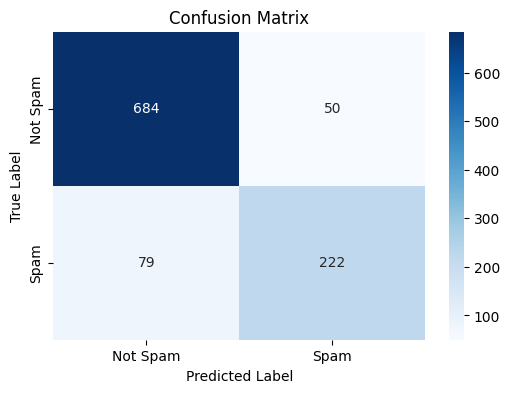

F1 Score: 0.77


In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, f1_score
from nltk.classify import NaiveBayesClassifier
from nltk.classify.util import accuracy

dataset = "/content/emails.csv"
emailDataFrame = pd.read_csv(dataset)

#droping column email number because its not needed
emailDataFrame = emailDataFrame.drop(columns=['Email No.'])

#droping column prediction in the input and assigning column prediction to output
X = emailDataFrame.drop(columns=['Prediction'])
y = emailDataFrame['Prediction']

#spliting data into trainSet and testSet
trainX, testX, trainY, testY = train_test_split(X, y, test_size=0.2, random_state=25)

#converting data formate into nltk supported formate
def convertFormate(X, y):
    dataNltk = []
    for i in range(len(X)):
        feature_dict = {str(word): X.iloc[i][word] for word in X.columns}
        dataNltk.append((feature_dict, y.iloc[i]))
    return dataNltk

dataTrain = convertFormate(trainX, trainY)
dataTest = convertFormate(testX, testY)

#using Naive base classifier for training
classifier = NaiveBayesClassifier.train(dataTrain)

#checking accuracing and printing it
accuracy_score = accuracy(classifier, dataTest)
print(f"Accuracy: {accuracy_score * 100:.2f}%")

#pridicting label
predic = [classifier.classify(sample[0]) for sample in dataTest]
realData = testY.values

#calculating confusion matrix
conf_matrix = confusion_matrix(realData, predic)





print("Classification Report:\n", classification_report(realData, predic))


# Ploting confusion matrix
def plot_confusion_matrix(conf_matrix):
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, xticklabels=["Not Spam", "Spam"], yticklabels=["Not Spam", "Spam"] , fmt="d", cmap="Blues")
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

plot_confusion_matrix(conf_matrix)


#calculating f1 score and printing
f1 = f1_score(realData, predic, average='binary')
print(f"F1 Score: {f1:.2f}")


#final remarks
#The Model is trained by using Nive based classifier and the accuracy of the system is about 87.76% and the f1 score is about 0.77


In [ ]:
#